In [1]:
import os
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch.nn as nn
import torch.optim
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import multitask.dataset as dataset
from multitask.models.task_switching import get_task_model
import multitask.models.task_switching.hooks as hooks
from multitask.utils.training import get_device
from multitask.utils.argparse import check_runs

Run first:
- `results_linear_decoder_all.ipynb`
- `results_linear_decoder_first.ipynb`
- `results_linear_decoder_removed.ipynb`

In [2]:
plt.style.use('../style/plots.mplstyle')

In [3]:
path_data = os.path.join('..', '..', 'data')
path_figure = os.path.join('svg', 'figure03c_linear_decoder.svg')
path_results_first = os.path.join('pickle', 'results_linear_decoder_first.pickle')
path_results_all = os.path.join('pickle', 'results_linear_decoder_all.pickle')
path_results_removed = os.path.join('pickle', 'results_linear_decoder_removed.pickle')

In [4]:
with open(path_results_first, 'rb') as handle:
    results_first = pickle.load(handle)

with open(path_results_all, 'rb') as handle:
    results_all = pickle.load(handle)

with open(path_results_removed, 'rb') as handle:
    results_removed = pickle.load(handle)

In [5]:
mean_results_first_numbers = results_first['numbers'].mean(axis=0)
std_results_first_numbers = results_first['numbers'].std(axis=0)

mean_results_first_tasks = results_first['tasks'].mean(axis=0)
std_results_first_tasks = results_first['tasks'].std(axis=0)

mean_results_first_congruency = results_first['congruency'].mean(axis=0)
std_results_first_congruency = results_first['congruency'].std(axis=0)

In [6]:
mean_results_all_numbers = results_all['numbers'].mean(axis=0)
std_results_all_numbers = results_all['numbers'].std(axis=0)

mean_results_all_tasks = results_all['tasks'].mean(axis=0)
std_results_all_tasks = results_all['tasks'].std(axis=0)

mean_results_all_congruency = results_all['congruency'].mean(axis=0)
std_results_all_congruency = results_all['congruency'].std(axis=0)

In [7]:
mean_results_removed_numbers = results_removed['numbers'].mean(axis=0)
std_results_removed_numbers = results_removed['numbers'].std(axis=0)

mean_results_removed_tasks = results_removed['tasks'].mean(axis=0)
std_results_removed_tasks = results_removed['tasks'].std(axis=0)

mean_results_removed_congruency = results_removed['congruency'].mean(axis=0)
std_results_removed_congruency = results_removed['congruency'].std(axis=0)

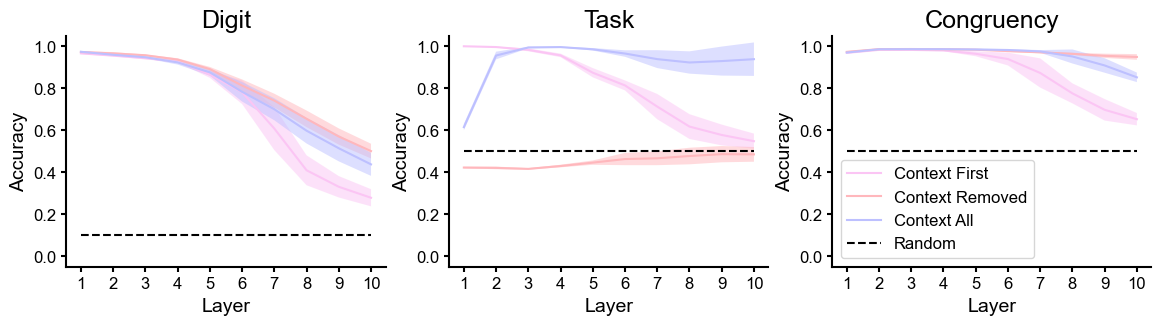

In [8]:
num_layers = len(mean_results_removed_numbers)
layers = range(1, num_layers+1)

fig, ax = plt.subplots(1, 3, figsize=(14, 3))

ax[0].plot(layers,
         mean_results_first_numbers)
ax[0].fill_between(layers,
                 mean_results_first_numbers-std_results_first_numbers,
                 mean_results_first_numbers+std_results_first_numbers,
                 alpha=0.5)

ax[0].plot(layers,
           mean_results_removed_numbers)
ax[0].fill_between(layers,
                 mean_results_removed_numbers-std_results_removed_numbers,
                 mean_results_removed_numbers+std_results_removed_numbers,
                 alpha=0.5)

ax[0].plot(layers,
         mean_results_all_numbers)
ax[0].fill_between(layers,
                 mean_results_all_numbers-std_results_all_numbers,
                 mean_results_all_numbers+std_results_all_numbers,
                 alpha=0.5)
ax[0].plot(layers, num_layers * [0.1], 'k--')


ax[0].set_ylim(-0.05, 1.05)
ax[0].set_title('Digit', fontsize=18)
ax[0].set_ylabel('Accuracy', fontsize=14)
ax[0].set_xlabel('Layer', fontsize=14)
ax[0].tick_params(labelsize=12)
ax[0].xaxis.set_ticks(range(1, num_layers+1))

ax[1].plot(layers,
           mean_results_first_tasks)
ax[1].fill_between(layers,
                 mean_results_first_tasks-std_results_first_tasks,
                 mean_results_first_tasks+std_results_first_tasks,
                 alpha=0.5)

ax[1].plot(layers,
           mean_results_removed_tasks)
ax[1].fill_between(layers,
                   mean_results_removed_tasks-std_results_removed_numbers,
                   mean_results_removed_tasks+std_results_removed_numbers,
                   alpha=0.5)

ax[1].plot(layers,
         mean_results_all_tasks)
ax[1].fill_between(layers,
                 mean_results_all_tasks-std_results_all_tasks,
                 mean_results_all_tasks+std_results_all_tasks,
                 alpha=0.5)

ax[1].plot(layers, num_layers * [0.5], 'k--')

ax[1].set_ylim(-0.05, 1.05)
ax[1].set_title('Task', fontsize=18)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].set_xlabel('Layer', fontsize=14)
ax[1].tick_params(labelsize=12)
ax[1].xaxis.set_ticks(range(1, num_layers+1))


ax[2].plot(layers,
           mean_results_first_congruency)
ax[2].fill_between(layers,
                 mean_results_first_congruency-std_results_first_congruency,
                 mean_results_first_congruency+std_results_first_congruency,
                 alpha=0.5)


ax[2].plot(layers,
           mean_results_removed_congruency)
ax[2].fill_between(layers,
                 mean_results_removed_congruency-std_results_removed_congruency,
                 mean_results_removed_congruency+std_results_removed_congruency,
                 alpha=0.5)


ax[2].plot(layers,
           mean_results_all_congruency)
ax[2].fill_between(layers,
                 mean_results_all_congruency-std_results_all_congruency,
                 mean_results_all_congruency+std_results_all_congruency,
                 alpha=0.5)

ax[2].plot(layers, num_layers * [0.5], 'k--')


ax[2].set_ylim(-0.05, 1.05)
ax[2].set_ylabel('Accuracy', fontsize=14)
ax[2].set_title('Congruency', fontsize=18)
ax[2].set_xlabel('Layer', fontsize=14)
ax[2].tick_params(labelsize=12)
ax[2].xaxis.set_ticks(range(1, num_layers+1))
ax[2].legend(['Context First', 'Context Removed', 'Context All', 'Random'], prop={'size':12})

fig.savefig(path_figure)
plt.show()